Для запуска:
1. Вставьте в ячейке ниже свою ссылку вместо этой ссылки на изображение из сети.
2. Запустите файл, модель загрузится автоматически
3. Результат классификации в самом конце

## Вставьте сюда свою ссылку на изображение из сети

In [16]:
!wget -O custom2.jpg https://tse3.mm.bing.net/th/id/OIP.0j0_-F4OJ8l232gORTMeJAHaJX?r=0&cb=thfc1&w=1012&h=1280&rs=1&pid=ImgDetMain&o=7&rm=3

--2025-08-08 10:50:12--  https://tse3.mm.bing.net/th/id/OIP.0j0_-F4OJ8l232gORTMeJAHaJX?r=0
Resolving tse3.mm.bing.net (tse3.mm.bing.net)... 150.171.27.10, 150.171.28.10, 2620:1ec:33::10, ...
Connecting to tse3.mm.bing.net (tse3.mm.bing.net)|150.171.27.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76225 (74K) [image/jpeg]
Saving to: ‘custom2.jpg’

custom2.jpg         100%[===================>]  74.44K  --.-KB/s    in 0.009s  

2025-08-08 10:50:13 (7.99 MB/s) - ‘custom2.jpg’ saved [76225/76225]



## Запустите часть с моделью

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.models import load_model
from google.colab import files
from tensorflow.keras.preprocessing import image

In [12]:
!pip install gdown --quiet
import gdown
file_id = "1I2gYBjFBVkCIO78D107XkM7CvsiMveXL"
url = f"https://drive.google.com/uc?id={file_id}"
output = "george_final.h5"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1I2gYBjFBVkCIO78D107XkM7CvsiMveXL
To: /content/george_final.h5
100%|██████████| 162k/162k [00:00<00:00, 57.5MB/s]


'george_final.h5'

In [13]:
model5 = load_model("george_final.h5", compile=False)

In [14]:
model5.compile(
    optimizer='adam',                     # or whatever optimizer you used
    loss='binary_crossentropy',           # your training loss
    metrics=['accuracy']                  # the metric(s) you want
)

In [15]:
# предобработка изображений
def load_preprocess(filename, img_shape=224):
# загрузка изображения
  img = tf.io.read_file(filename)
  # изображение в тензор
  img = tf.image.decode_image(img)
# подгон размера изображения под общий стандарт (224, 224)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

In [17]:
custom_george_dir = '/content/custom2.jpg'

In [27]:
custom_george = load_preprocess(custom_george_dir)
custom_pred= model5.predict(tf.expand_dims(custom_george, axis=0))
class_names = ['Святой Георгий', 'Не святой Георгий']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [29]:
def pred_plot(model, filename, class_names=class_names):
  img= load_preprocess(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class= class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

## Результат классификации



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


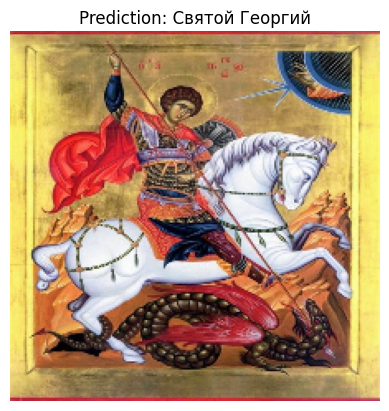

In [30]:
pred_plot(model5, custom_george_dir)